In [1]:
# Set up autoreloading of modules so that I can debug code in external files
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt

import bydatetime
import hillpylib as hm
from pandas import Timestamp

# Let's check what version of pandas, numpy and matplotlib we are using
print ("pandas version ", pd.__version__)
print ("numpy version ", np.version.version)
print ("matplotlib version ", mp.__version__)

pandas version  0.15.2
numpy version  1.9.2
matplotlib version  1.4.3


# Put it all together

Below I've strung together all the pieces to do an entire Hillmaker run. Change inputs as needed (e.g. scenario_name and associated parameter values) and run all the cells below. You can skip rereading the main input file if that isn't changing.

## Read main stop data file

In [3]:
file_stopdata = 'data/ShortStay.csv'
df = pd.read_csv(file_stopdata, parse_dates=['InRoomTS','OutRoomTS'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59877 entries, 0 to 59876
Data columns (total 4 columns):
PatID        59877 non-null int64
InRoomTS     59877 non-null datetime64[ns]
OutRoomTS    59877 non-null datetime64[ns]
PatType      59877 non-null object
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 2.3+ MB


## Set input parameters

In [4]:
# Required inputs
scenario_name = 'sstest_60'
in_fld_name = 'InRoomTS'
out_fld_name = 'OutRoomTS'
cat_fld_name = 'PatType'
start_analysis = '1/1/1996'
end_analysis = '3/30/1996 23:45'


# Optional inputs

# This next field wasn't in original Hillmaker. Use it to specify the name to use for the overall totals.
# At this point the totals actually aren't being calculated.
tot_fld_name = 'SSU'

bin_size_mins = 60

includecats = ['ART','IVT']

## Convert string dates to actual datetimes
start_analysis_dt = pd.Timestamp(start_analysis)
end_analysis_dt = pd.Timestamp(end_analysis)

# Mapper from weekday integer to string
daynum_to_dayname = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}


## Create the by datetime table

In [13]:
df2 = df[df['PatType'].isin(includecats)]

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38940 entries, 0 to 59875
Data columns (total 4 columns):
PatID        38940 non-null int64
InRoomTS     38940 non-null datetime64[ns]
OutRoomTS    38940 non-null datetime64[ns]
PatType      38940 non-null object
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 1.5+ MB


In [15]:
df2.groupby('PatType').describe()

PatID
PatType                    
ART     count   5761.000000
        mean   29665.735983
        std    17236.415692
        min       10.000000
        25%    14738.000000
        50%    29511.000000
        75%    44784.000000
        max    59826.000000
IVT     count  33179.000000
        mean   30015.498357
        std    17270.541655
        min        1.000000
        25%    15099.500000
        50%    29956.000000
        75%    45027.500000
        max    59876.000000

In [16]:
df = df[df['PatType'].isin(includecats)]

In [17]:
df.groupby('PatType').describe()

PatID
PatType                    
ART     count   5761.000000
        mean   29665.735983
        std    17236.415692
        min       10.000000
        25%    14738.000000
        50%    29511.000000
        75%    44784.000000
        max    59826.000000
IVT     count  33179.000000
        mean   30015.498357
        std    17270.541655
        min        1.000000
        25%    15099.500000
        50%    29956.000000
        75%    45027.500000
        max    59876.000000

In [21]:
bydt_df = bydatetime.make_bydatetime(df,
                                     in_fld_name,
                                     out_fld_name,
                                     cat_fld_name,
                                     start_analysis,
                                     end_analysis,
                                     tot_fld_name,
                                     bin_size_mins)

rng_bydt created: 0.0013
using derived categories: 0.0048
Seeded bydatetime DataFrame created: 0.0422
dayofweek, bin_of_day, bin_of_week computed: 0.3331
Multi-index on bydatetime DataFrame created: 0.3361
Multi-index fully lexsorted: 0.3393
Latest edits at 2015-06-25 22:43:03.267864
Num inner: 19795
Done processing 19795 stop recs: 14.4812
Done adding totals: 14.5464


In [6]:
bydt_df.dtypes

category               object
datetime       datetime64[ns]
arrivals              float64
departures            float64
occupancy             float64
day_of_week             int64
bin_of_day              int64
bin_of_week             int64
dtype: object

In [50]:
bydt_df

category            datetime  arrivals  \
category datetime                                                     
ART      1996-01-01 00:00:00      ART 1996-01-01 00:00:00         0   
         1996-01-01 01:00:00      ART 1996-01-01 01:00:00         0   
         1996-01-01 02:00:00      ART 1996-01-01 02:00:00         0   
         1996-01-01 03:00:00      ART 1996-01-01 03:00:00         0   
         1996-01-01 04:00:00      ART 1996-01-01 04:00:00         0   
         1996-01-01 05:00:00      ART 1996-01-01 05:00:00         0   
         1996-01-01 06:00:00      ART 1996-01-01 06:00:00         0   
         1996-01-01 07:00:00      ART 1996-01-01 07:00:00         0   
         1996-01-01 08:00:00      ART 1996-01-01 08:00:00         0   
         1996-01-01 09:00:00      ART 1996-01-01 09:00:00         0   
         1996-01-01 10:00:00      ART 1996-01-01 10:00:00         0   
         1996-01-01 11:00:00      ART 1996-01-01 11:00:00         0   
         1996-01-01 12:00:00      ART 1996-01-01 12:00:00         0   
         1996-01-01 13:00:00      ART 1996-01-01 13:00:00         0   
         1996-01-01 14:00:00      ART 1996-01-01 14:00:00         0   
         1996-01-01 15:00:00      ART 1996-01-01 15:00:00         0   
         1996-01-01 16:00:00      ART 1996-01-01 16:00:00         0   
         1996-01-01 17:00:00      ART 1996-01-01 17:00:00         0   
         1996-01-01 18:00:00      ART 1996-01-01 18:00:00         0   
         1996-01-01 19:00:00      ART 1996-01-01 19:00:00         0   
         1996-01-01 20:00:00      ART 1996-01-01 20:00:00         0   
         1996-01-01 21:00:00      ART 1996-01-01 21:00:00         0   
         1996-01-01 22:00:00      ART 1996-01-01 22:00:00         0   
         1996-01-01 23:00:00      ART 1996-01-01 23:00:00         0   
         1996-01-02 00:00:00      ART 1996-01-02 00:00:00         0   
         1996-01-02 01:00:00      ART 1996-01-02 01:00:00         0   
         1996-01-02 02:00:00      ART 1996-01-02 02:00:00         0   
         1996-01-02 03:00:00      ART 1996-01-02 03:00:00         0   
         1996-01-02 04:00:00      ART 1996-01-02 04:00:00         0   
         1996-01-02 05:00:00      ART 1996-01-02 05:00:00         0   
...                               ...                 ...       ...   
IVT      1996-03-29 18:00:00      IVT 1996-03-29 18:00:00         9   
         1996-03-29 19:00:00      IVT 1996-03-29 19:00:00         2   
         1996-03-29 20:00:00      IVT 1996-03-29 20:00:00         1   
         1996-03-29 21:00:00      IVT 1996-03-29 21:00:00         0   
         1996-03-29 22:00:00      IVT 1996-03-29 22:00:00         0   
         1996-03-29 23:00:00      IVT 1996-03-29 23:00:00         0   
         1996-03-30 00:00:00      IVT 1996-03-30 00:00:00         0   
         1996-03-30 01:00:00      IVT 1996-03-30 01:00:00         0   
         1996-03-30 02:00:00      IVT 1996-03-30 02:00:00         0   
         1996-03-30 03:00:00      IVT 1996-03-30 03:00:00         0   
         1996-03-30 04:00:00      IVT 1996-03-30 04:00:00         0   
         1996-03-30 05:00:00      IVT 1996-03-30 05:00:00         0   
         1996-03-30 06:00:00      IVT 1996-03-30 06:00:00         2   
         1996-03-30 07:00:00      IVT 1996-03-30 07:00:00         3   
         1996-03-30 08:00:00      IVT 1996-03-30 08:00:00         3   
         1996-03-30 09:00:00      IVT 1996-03-30 09:00:00         3   
         1996-03-30 10:00:00      IVT 1996-03-30 10:00:00         5   
         1996-03-30 11:00:00      IVT 1996-03-30 11:00:00         2   
         1996-03-30 12:00:00      IVT 1996-03-30 12:00:00         3   
         1996-03-30 13:00:00      IVT 1996-03-30 13:00:00         0   
         1996-03-30 14:00:00      IVT 1996-03-30 14:00:00         0   
         1996-03-30 15:00:00      IVT 1996-03-30 15:00:00         0   
         1996-03-30 16:00:00      IVT 1996-03-30 16:00:00         0   
         1996-03-30 17:00:00      IVT 1996-03-30 17:0

In [51]:
bydt_group = bydt_df.groupby(['datetime'])

In [54]:
tot_arrivals = bydt_group.arrivals.sum()
tot_departures = bydt_group.departures.sum()
tot_occ = bydt_group.occupancy.sum()

#bydt_totals = pd.DataFrame(tot_arrivals)


In [84]:
tot_data = [tot_arrivals,tot_departures,tot_occ]
tot_df = pd.concat(tot_data, axis = 1, keys = [s.name for s in tot_data])

In [90]:
tot_data = [tot_arrivals,tot_departures,tot_occ]
tot_df = pd.concat(tot_data, axis = 1, keys = [s.name for s in tot_data])
tot_df['day_of_week'] = tot_df.index.map(lambda x: x.weekday())
tot_df['bin_of_day'] =  tot_df.index.map(lambda x: hm.bin_of_day(x,bin_size_mins))
tot_df['bin_of_week'] = tot_df.index.map(lambda x: hm.bin_of_week(x,bin_size_mins))

In [91]:
tot_df['category'] = tot_fld_name
tot_df.set_index('category', append=True, inplace=True, drop=False)
tot_df = tot_df.reorder_levels(['category', 'datetime'])
tot_df['datetime'] = tot_df.index.levels[1]

In [ ]:
tot_df

In [94]:
tot_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2160 entries, (Total, 1996-01-01 00:00:00) to (Total, 1996-03-30 23:00:00)
Data columns (total 8 columns):
arrivals       2160 non-null float64
departures     2160 non-null float64
occupancy      2160 non-null float64
day_of_week    2160 non-null int64
bin_of_day     2160 non-null int64
bin_of_week    2160 non-null int64
category       2160 non-null object
datetime       2160 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 158.4+ KB


In [96]:
bydt_df = pd.concat([bydt_df,tot_df])

In [ ]:
bydt_df.tail(n=25)

## Compute summary stats

In [6]:
def get_occstats(group, stub=''):
    return {stub+'count': group.count(), stub+'mean': group.mean(), 
            stub+'min': group.min(),
            stub+'max': group.max(), 'stdev': group.std(), 
            stub+'p50': group.quantile(0.5), stub+'p55': group.quantile(0.55),
            stub+'p60': group.quantile(0.6), stub+'p65': group.quantile(0.65),
            stub+'p70': group.quantile(0.7), stub+'p75': group.quantile(0.75),
            stub+'p80': group.quantile(0.8), stub+'p85': group.quantile(0.85),
            stub+'p90': group.quantile(0.9), stub+'p95': group.quantile(0.95),
            stub+'p975': group.quantile(0.975), 
            stub+'p99': group.quantile(0.99)}

In [22]:
bydt_dfgrp2 = bydt_df.groupby(['category','day_of_week','bin_of_day'])

occ_stats = bydt_dfgrp2['occupancy'].apply(get_occstats)
arr_stats = bydt_dfgrp2['arrivals'].apply(get_occstats)
dep_stats = bydt_dfgrp2['departures'].apply(get_occstats)

occ_stats_summary = occ_stats.unstack()
arr_stats_summary = arr_stats.unstack()
dep_stats_summary = dep_stats.unstack()



In [32]:
occ_stats.dtype

dtype('float64')

In [33]:
type(occ_stats)

pandas.core.series.Series

In [36]:
occ_stats_summary.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 336 entries, (ART, 0, 0) to (IVT, 6, 23)
Data columns (total 17 columns):
count    336 non-null float64
max      336 non-null float64
mean     336 non-null float64
min      336 non-null float64
p50      336 non-null float64
p55      336 non-null float64
p60      336 non-null float64
p65      336 non-null float64
p70      336 non-null float64
p75      336 non-null float64
p80      336 non-null float64
p85      336 non-null float64
p90      336 non-null float64
p95      336 non-null float64
p975     336 non-null float64
p99      336 non-null float64
stdev    336 non-null float64
dtypes: float64(17)
memory usage: 46.2+ KB


## Write summaries and by datetime out to CSV

In [23]:
file_bydt_csv = 'testing/bydate_' + scenario_name + '.csv'
bydt_df.to_csv(file_bydt_csv, index=False)

file_occ_csv = 'testing/occ_stats_' + scenario_name + '.csv'
file_arr_csv = 'testing/arr_stats_' + scenario_name + '.csv'
file_dep_csv = 'testing/dep_stats_' + scenario_name + '.csv'

occ_stats_summary.to_csv(file_occ_csv)
arr_stats_summary.to_csv(file_arr_csv)
dep_stats_summary.to_csv(file_dep_csv)

## Debugging

In [10]:
ts = pd.Timestamp('19960103 00:00:00')
print(ts)

1996-01-03 00:00:00


In [25]:
24000/24

1000.0

In [11]:
df_ART = df[(df.PatType == 'ART') & (df.InRoomTS < ts)]

In [12]:
df_ART.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 9 to 174
Data columns (total 4 columns):
PatID        30 non-null int64
InRoomTS     30 non-null datetime64[ns]
OutRoomTS    30 non-null datetime64[ns]
PatType      30 non-null object
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 1.2+ KB


In [13]:
df_ART

,PatID,InRoomTS,OutRoomTS,PatType
9,10,1996-01-02 06:35:00,1996-01-02 08:30:00,ART
12,13,1996-01-02 06:55:00,1996-01-02 08:45:00,ART
15,16,1996-01-02 07:18:00,1996-01-02 08:53:00,ART
17,18,1996-01-02 07:23:00,1996-01-02 08:30:00,ART
21,22,1996-01-02 07:33:00,1996-01-02 08:45:00,ART
24,25,1996-01-02 07:40:00,1996-01-02 08:55:00,ART
25,26,1996-01-02 07:50:00,1996-01-02 10:10:00,ART
27,28,1996-01-02 07:52:00,1996-01-02 09:10:00,ART
30,31,1996-01-02 08:00:00,1996-01-02 09:00:00,ART
31,32,1996-01-02 08:02:00,1996-01-02 10:00:00,ART


In [14]:
bydt_df.head()

category            datetime  arrivals  \
category datetime                                                     
ART      1996-01-01 00:00:00      ART 1996-01-01 00:00:00         0   
         1996-01-01 01:00:00      ART 1996-01-01 01:00:00         0   
         1996-01-01 02:00:00      ART 1996-01-01 02:00:00         0   
         1996-01-01 03:00:00      ART 1996-01-01 03:00:00         0   
         1996-01-01 04:00:00      ART 1996-01-01 04:00:00         0   

                              departures  occupancy  day_of_week  bin_of_day  \
category datetime                                                              
ART      1996-01-01 00:00:00           0          0            0           0   
         1996-01-01 01:00:00           0          0            0           1   
         1996-01-01 02:00:00           0          0            0           2   
         1996-01-01 03:00:00           0          0            0           3   
         1996-01-01 04:00:00           0          0            0           4   

                              bin_of_week  
category datetime                          
ART      1996-01-01 00:00:00            0  
         1996-01-01 01:00:00            1  
         1996-01-01 02:00:00            2  
         1996-01-01 03:00:00            3  
         1996-01-01 04:00:00            4

In [15]:
bydt_df[25:50]

category            datetime  arrivals  \
category datetime                                                     
ART      1996-01-02 01:00:00      ART 1996-01-02 01:00:00         0   
         1996-01-02 02:00:00      ART 1996-01-02 02:00:00         0   
         1996-01-02 03:00:00      ART 1996-01-02 03:00:00         0   
         1996-01-02 04:00:00      ART 1996-01-02 04:00:00         0   
         1996-01-02 05:00:00      ART 1996-01-02 05:00:00         0   
         1996-01-02 06:00:00      ART 1996-01-02 06:00:00         2   
         1996-01-02 07:00:00      ART 1996-01-02 07:00:00         6   
         1996-01-02 08:00:00      ART 1996-01-02 08:00:00         5   
         1996-01-02 09:00:00      ART 1996-01-02 09:00:00         5   
         1996-01-02 10:00:00      ART 1996-01-02 10:00:00         2   
         1996-01-02 11:00:00      ART 1996-01-02 11:00:00         5   
         1996-01-02 12:00:00      ART 1996-01-02 12:00:00         1   
         1996-01-02 13:00:00      ART 1996-01-02 13:00:00         3   
         1996-01-02 14:00:00      ART 1996-01-02 14:00:00         0   
         1996-01-02 15:00:00      ART 1996-01-02 15:00:00         1   
         1996-01-02 16:00:00      ART 1996-01-02 16:00:00         0   
         1996-01-02 17:00:00      ART 1996-01-02 17:00:00         0   
         1996-01-02 18:00:00      ART 1996-01-02 18:00:00         0   
         1996-01-02 19:00:00      ART 1996-01-02 19:00:00         0   
         1996-01-02 20:00:00      ART 1996-01-02 20:00:00         0   
         1996-01-02 21:00:00      ART 1996-01-02 21:00:00         0   
         1996-01-02 22:00:00      ART 1996-01-02 22:00:00         0   
         1996-01-02 23:00:00      ART 1996-01-02 23:00:00         0   
         1996-01-03 00:00:00      ART 1996-01-03 00:00:00         0   
         1996-01-03 01:00:00      ART 1996-01-03 01:00:00         0   

                              departures  occupancy  day_of_week  bin_of_day  \
category datetime                                                              
ART      1996-01-02 01:00:00           0   0.000000            1           1   
         1996-01-02 02:00:00           0   0.000000            1           2   
         1996-01-02 03:00:00           0   0.000000            1           3   
         1996-01-02 04:00:00           0   0.000000            1           4   
         1996-01-02 05:00:00           0   0.000000            1           5   
         1996-01-02 06:00:00           0   0.500000            1           6   
         1996-01-02 07:00:00           0   4.400000            1           7   
         1996-01-02 08:00:00           6   9.716667            1           8   
         1996-01-02 09:00:00           4   6.933333            1           9   
         1996-01-02 10:00:00           5   4.833333            1          10   
         1996-01-02 11:00:00           2   5.516667            1          11   
         1996-01-02 12:00:00           6   5.016667            1          12   
         1996-01-02 13:00:00           3   2.900000            1          13   
         1996-01-02 14:00:00           1   2.516667            1          14   
         1996-01-02 15:00:00           2   1.483333            1          15   
         1996-01-02 16:00:00           0   1.000000            1          16   
         1996-01-02 17:00:00           1   0.000000            1          17   
         1996-01-02 18:00:00           0   0.000000            1          18   
         1996-01-02 19:00:00           0   0.000000            1          19   
         1996-01-02 20:00:00           0   0.000000            1          20   
         1996-01-02 21:00:00           0   0.000000            1          21   
         1996-01-02 22:00:00           0   0.000000            1          22   
         1996-01-02 23:00:00           0   0.000000            1          23   
         1996-01-03 00:00:00           0   0.000000            2           0   
         1996-01-03 01:00:00   

In [23]:
import pandas as pd
from pandas import Timestamp

import hillmaker as hm



file_stopdata = 'data/unit_stop_log_Experiment1_Scenario1_Rep1.csv'

scenario_name = 'log_unitocc_test'
in_fld_name = 'EnteredTS'
out_fld_name = 'ExitedTS'
cat_fld_name = 'Unit'
start_analysis = '2/15/2015 00:00'
end_analysis = '6/16/2016 00:00'

# Optional inputs

tot_fld_name = 'OBTot'
bin_size_mins = 60
includecats = ['LDR','PP']

df = pd.read_csv(file_stopdata,index_col=0)
basedate = Timestamp('20150215 00:00:00')
df['EnteredTS'] = df.apply(lambda row:
                           Timestamp(round((basedate + pd.DateOffset(hours=row['Entered'])).value,-9)), axis=1)

df['ExitedTS'] = df.apply(lambda row:
                          Timestamp(round((basedate + pd.DateOffset(hours=row['Exited'])).value,-9)), axis=1)

#%time hm.run_hillmaker(scenario_name,df,in_fld_name, out_fld_name,cat_fld_name,start_analysis,end_analysis,tot_fld_name,bin_size_mins,categories=includecats,outputpath='./testing')


In [20]:
df.head()

,EntityID,PatientType,Unit,TriedToEnter,Entered,TriedToExit,Exited,PlannedLOS,Entered_TriedToEnter,TriedToExit_Entered,Exit_TriedToExit,Exit_Enter,Exit_TriedToEnter,BlockedByDownstreamHours,EnteredTS,ExitedTS
0,45,1,Obs,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,2015-02-15 00:00:00,2015-02-15 00:00:00
1,46,1,Obs,2.296064,2.296064,2.296064,2.296064,0,0,0,0,0,0,0,2015-02-15 02:17:46,2015-02-15 02:17:46
2,47,1,Obs,3.037196,3.037196,3.037196,3.037196,0,0,0,0,0,0,0,2015-02-15 03:02:14,2015-02-15 03:02:14
3,48,1,Obs,4.325327,4.325327,4.325327,4.325327,0,0,0,0,0,0,0,2015-02-15 04:19:31,2015-02-15 04:19:31
4,49,2,Obs,4.564865,4.564865,4.564865,4.564865,0,0,0,0,0,0,0,2015-02-15 04:33:54,2015-02-15 04:33:54


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52860 entries, 0 to 52859
Data columns (total 16 columns):
EntityID                    52860 non-null int64
PatientType                 52860 non-null int64
Unit                        52860 non-null object
TriedToEnter                52860 non-null float64
Entered                     52860 non-null float64
TriedToExit                 52860 non-null float64
Exited                      52860 non-null float64
PlannedLOS                  52860 non-null float64
Entered_TriedToEnter        52860 non-null float64
TriedToExit_Entered         52860 non-null float64
Exit_TriedToExit            52860 non-null float64
Exit_Enter                  52860 non-null float64
Exit_TriedToEnter           52860 non-null float64
BlockedByDownstreamHours    52860 non-null float64
EnteredTS                   52860 non-null datetime64[ns]
ExitedTS                    52860 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(11), int64(2), object(1)
memory

## Computing occupancy statistics

Need to compute a bunch of output stats to use for visualization, metamodeling and to evaluate scenarios.

### Overall utilization

It would be nice if we could just Hillmaker with bin size of one week. Let's try it.



In [36]:
scenario_name = 'log_unitocc_test_steadystate'
hm.run_hillmaker(scenario_name,df,in_fld_name, out_fld_name,cat_fld_name,
                 start_analysis,end_analysis,tot_fld_name,1440,
                 categories=includecats,totals=False,outputpath='./testing')

rng_bydt created: 0.0016
using specified categories: 0.0124
Seeded bydatetime DataFrame created: 0.0252
dayofweek, bin_of_day, bin_of_week computed: 0.0520
Multi-index on bydatetime DataFrame created: 0.0550
Multi-index fully lexsorted: 0.0569
Latest edits at 2015-06-26 13:45:09.462399
Num inner: 15805
Done processing 15849 stop recs: 11.2492
Done with summary stats: 124.963865


In [33]:
occ_df = pd.read_csv('testing/occ_stats_summary_log_unitocc_test_steadystate.csv')

In [34]:
occ_df

,category,day_of_week,bin_of_day,count,max,mean,min,p50,p55,p60,p65,p70,p75,p80,p85,p90,p95,p975,p99,stdev
0,LDR,0,0,70,12.551887,7.964751,2.796759,7.749132,7.959083,8.579539,8.811633,9.132047,9.477954,10.159817,10.511690,11.105409,11.642197,11.879875,12.249205,2.232001
1,LDR,1,0,70,13.000000,8.085966,3.474745,7.810266,8.134329,8.274419,8.379345,8.927502,9.247156,9.522454,9.824342,10.801959,12.081047,12.890282,12.938914,2.028946
2,LDR,2,0,70,12.457118,8.104782,3.336412,8.034381,8.335889,8.509238,8.790906,9.160778,9.600029,10.188361,10.530722,10.932208,11.341849,11.996434,12.428552,2.077740
3,LDR,3,0,70,12.875243,8.124963,0.000000,8.046973,8.395637,8.772951,9.116812,9.397748,9.934925,10.549181,10.789817,10.992679,11.717129,12.064749,12.450566,2.382311
4,LDR,4,0,69,12.850544,8.484828,2.375741,8.819942,8.849414,9.170447,9.495343,9.666833,9.906759,10.288935,10.986137,11.519086,11.644289,12.043488,12.356167,2.268249
5,LDR,5,0,69,12.730498,7.954601,3.427373,7.735104,7.927241,8.171174,8.579282,8.673562,8.993356,9.488528,9.804104,10.919875,11.644685,12.088810,12.328550,2.003962
6,LDR,6,0,70,12.716262,8.178603,2.697824,7.887957,8.298356,8.664336,9.110238,9.229181,9.622784,10.255775,10.700716,11.066123,11.503365,12.051033,12.572232,2.140319
7,PP,0,0,70,45.760185,35.467947,10.258866,35.786036,36.118146,36.308977,37.043928,38.028598,38.778987,38.944359,40.188310,41.729775,43.573232,44.748670,45.448272,5.265547
8,PP,1,0,70,46.000000,35.804196,20.487118,37.390312,38.021487,38.555859,39.470370,39.688156,39.889198,40.491523,41.203124,41.487889,42.126422,42.621901,44.102668,5.508826
9,PP,2,0,70,45.942662,36.399121,22.880706,37.192986,37.879600,38.649655,39.328046,40.003108,40.990822,41.402132,42.335948,43.095137,43.814442,44.781085,45.679695,5.725518


In [38]:
bydt_df

,category,datetime,arrivals,departures,occupancy,day_of_week,bin_of_day,bin_of_week
0,LDR,2015-02-15 00:00:00,12,7,2.697824,6,0,6
1,LDR,2015-02-16 00:00:00,17,17,6.657824,0,0,0
2,LDR,2015-02-17 00:00:00,16,13,6.210556,1,0,1
3,LDR,2015-02-18 00:00:00,17,18,7.160961,2,0,2
4,LDR,2015-02-19 00:00:00,16,17,7.375949,3,0,3
5,LDR,2015-02-20 00:00:00,21,19,9.493576,4,0,4
6,LDR,2015-02-21 00:00:00,18,17,8.906806,5,0,5
7,LDR,2015-02-22 00:00:00,16,19,8.305035,6,0,6
8,LDR,2015-02-23 00:00:00,15,16,6.672234,0,0,0
9,LDR,2015-02-24 00:00:00,18,16,6.563194,1,0,1


In [1]:
%matplotlib inline

In [2]:
import numpy as np
from numpy.random import randn
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
bydt_df = pd.read_csv('testing/bydatetime_log_unitocc_test_steadystate.csv')

In [12]:
pp_occ = bydt_df[(bydt_df['category'] == 'PP')]['occupancy']

(array([  1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   3.,   5.,  12.,
         26.,  40.,  59.,  70.,  75.,  72.,  57.,  37.,  30.]),
 array([  2.77378472,   4.93509549,   7.09640625,   9.25771701,
         11.41902778,  13.58033854,  15.74164931,  17.90296007,
         20.06427083,  22.2255816 ,  24.38689236,  26.54820312,
         28.70951389,  30.87082465,  33.03213542,  35.19344618,
         37.35475694,  39.51606771,  41.67737847,  43.83868924,  46.        ]),
 <a list of 20 Patch objects>)

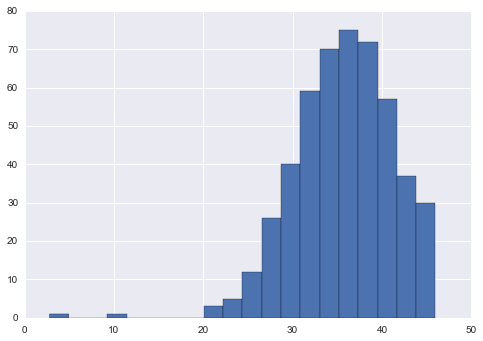

In [15]:
plt.hist(pp_occ.values,20)

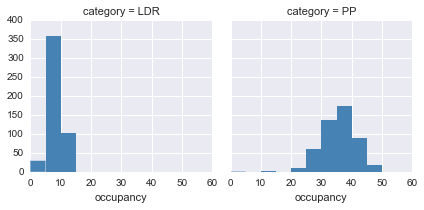

In [9]:
g = sns.FacetGrid(bydt_df, col="category", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "occupancy", color="steelblue", bins=bins, lw=0)